# Statsmodel Demo

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("./Data/airline_passengers.csv",index_col=0,parse_dates=True)

In [3]:
print(df.head())
print(df.columns)

            Thousands of Passengers
Month                              
1949-01-01                      112
1949-02-01                      118
1949-03-01                      132
1949-04-01                      129
1949-05-01                      121
Index(['Thousands of Passengers'], dtype='object')


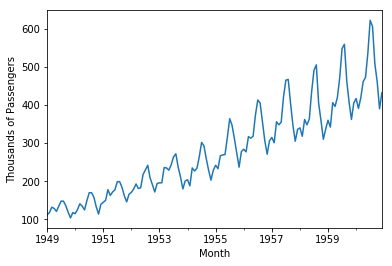

In [4]:
airline_plot = df['Thousands of Passengers'].plot()
airline_plot.autoscale(axis='x',tight=True)
airline_plot.set(ylabel='Thousands of Passengers');

# Naive Forecasting


<strong>$Y_t$ is the forecast for $Y_{t+1}$</strong>

In [5]:
df['Passenger_forecast'] = df['Thousands of Passengers'].shift(1)

In [6]:
df.head(10)

,Thousands of Passengers,Passenger_forecast
Month,,
1949-01-01,112,NaN
1949-02-01,118,112.0
1949-03-01,132,118.0
1949-04-01,129,132.0
1949-05-01,121,129.0
1949-06-01,135,121.0
1949-07-01,148,135.0
1949-08-01,148,148.0
1949-09-01,136,148.0


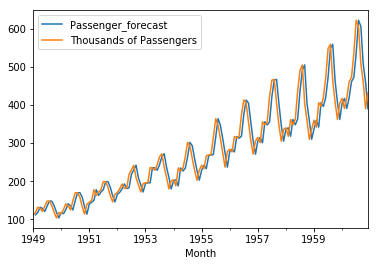

In [7]:
df[['Passenger_forecast','Thousands of Passengers']].plot().autoscale(axis='x', tight=True);

# Understanding Evaluation metrics

In [8]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
from math import sqrt


# When evaluated with self

In [9]:
df = df.dropna()
mse = mean_squared_error(df['Thousands of Passengers'],df['Thousands of Passengers'] )
print('MSE : %f' % mse)
rmse = sqrt(mse)
print('RMSE: %f' % rmse)
nrmse_mean = rmse/np.mean(df['Thousands of Passengers'])
print('NRMSE using mean: %f' % nrmse_mean)
nrmse_std = rmse/np.std(df['Thousands of Passengers'])
print('NRMSE using stdev: %f' % nrmse_std)
nrmse_range = rmse/(np.max(df['Thousands of Passengers'])- np.min(df['Thousands of Passengers']))
print('NRMSE using range: %f' % nrmse_range)
mae = mean_absolute_error(df['Thousands of Passengers'], df['Thousands of Passengers'])
print('MAE: %f' % mae)

MSE : 0.000000
RMSE: 0.000000
NRMSE using mean: 0.000000
NRMSE using stdev: 0.000000
NRMSE using range: 0.000000
MAE: 0.000000


# When evaluated against naive prediction

In [10]:
mse = mean_squared_error(df['Thousands of Passengers'], df['Passenger_forecast'])
print('MSE : %f' % mse)
rmse = sqrt(mse)
print('RMSE: %f' % rmse)
nrmse_mean = rmse/np.mean(df['Thousands of Passengers'])
print('NRMSE using mean: %f' % nrmse_mean)
nrmse_std = rmse/np.std(df['Thousands of Passengers'])
print('NRMSE using stdev: %f' % nrmse_std)
nrmse_range = rmse/(np.max(df['Thousands of Passengers'])- np.min(df['Thousands of Passengers']))
print('NRMSE using range: %f' % nrmse_range)
mae = mean_absolute_error(df['Thousands of Passengers'], df['Passenger_forecast'])
print('MAE: %f' % mae)

MSE : 1136.391608
RMSE: 33.710408
NRMSE using mean: 0.119763
NRMSE using stdev: 0.282967
NRMSE using range: 0.065078
MAE: 25.860140


# When evaluated against biased predictions

In [11]:
df['Passenger_forecast_2']= df['Passenger_forecast'] + 100

In [12]:
df[['Thousands of Passengers','Passenger_forecast','Passenger_forecast_2']].head()

,Thousands of Passengers,Passenger_forecast,Passenger_forecast_2
Month,,,
1949-02-01,118,112.0,212.0
1949-03-01,132,118.0,218.0
1949-04-01,129,132.0,232.0
1949-05-01,121,129.0,229.0
1949-06-01,135,121.0,221.0


In [13]:
mse = mean_squared_error(df['Thousands of Passengers'], df['Passenger_forecast_2'])
print('MSE : %f' % mse)
rmse = sqrt(mse)
print('RMSE: %f' % rmse)
nrmse_mean = rmse/np.mean(df['Thousands of Passengers'])
print('NRMSE using mean: %f' % nrmse_mean)
nrmse_std = rmse/np.std(df['Thousands of Passengers'])
print('NRMSE using stdev: %f' % nrmse_std)
nrmse_range = rmse/(np.max(df['Thousands of Passengers'])- np.min(df['Thousands of Passengers']))
print('NRMSE using range: %f' % nrmse_range)
mae = mean_absolute_error(df['Thousands of Passengers'], df['Passenger_forecast_2'])
print('MAE: %f' % mae)

MSE : 10688.839161
RMSE: 103.386842
NRMSE using mean: 0.367303
NRMSE using stdev: 0.867834
NRMSE using range: 0.199588
MAE: 97.762238


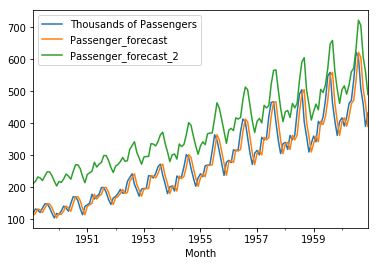

In [14]:
df[['Thousands of Passengers','Passenger_forecast','Passenger_forecast_2']].plot().autoscale(axis='x',tight=True);

# Using Statsmodels to get the trend



<div class="alert alert-info"><h3>Statsmodel Function:</h3>
<tt><a href='https://www.statsmodels.org/stable/generated/statsmodels.tsa.filters.hp_filter.hpfilter.html'><strong>statsmodels.tsa.filters.hp_filter.hpfilter</strong></a><font color=black>(X, lamb=1600)</font>&nbsp;&nbsp;</div>
    
The <a href='https://en.wikipedia.org/wiki/Hodrick%E2%80%93Prescott_filter'>Hodrick-Prescott filter</a> separates a time-series  $y_t$ into a trend component $\tau_t$ and a cyclical component $c_t$

$y_t = \tau_t + c_t$


In [15]:
df = pd.read_csv("./Data/airline_passengers.csv",index_col=0,parse_dates=True)

In [16]:
from statsmodels.tsa.filters.hp_filter import hpfilter

# Tuple unpacking
airline_cycle, airline_trend = hpfilter(df['Thousands of Passengers'], lamb=1600)

In [17]:
airline_cycle

Month
1949-01-01     -8.625586
1949-02-01     -3.651911
1949-03-01      9.327155
1949-04-01      5.319286
1949-05-01     -3.673675
                 ...    
1960-08-01    124.325492
1960-09-01     23.453495
1960-10-01    -26.164925
1960-11-01    -99.645953
1960-12-01    -60.089426
Name: Thousands of Passengers, Length: 144, dtype: float64

In [18]:
df['trend'] = airline_trend

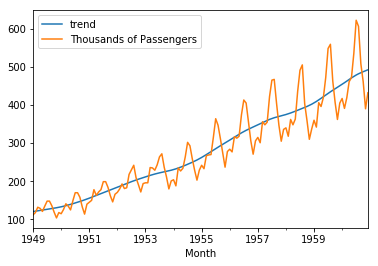

In [19]:
#plot of trend line
df[['trend','Thousands of Passengers']].plot().autoscale(axis='x',tight=True);

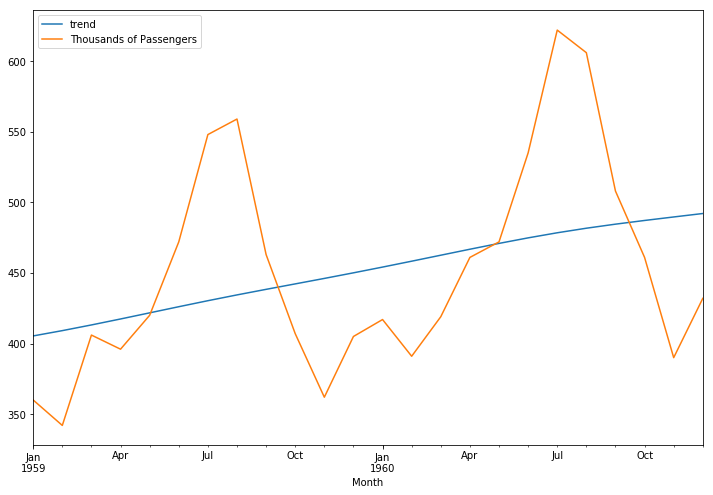

In [20]:
#zoom in the trend line
df[['trend','Thousands of Passengers']]['1959-01-01':].plot(figsize=(12,8)).autoscale(axis='x',tight=True);

# Seasonal Decomposition

A <em>seasonal decomposition</em> tool is available in statsmodel to separate out the different components from data. 

An <strong>additive</strong> model is used when the trend is more linear and the seasonality and trend components seem to be constant over time (e.g. every year we add 10,000 passengers).<br>

A <strong>multiplicative</strong> model is used when the trend is increasing (or decreasing) at a non-linear rate (e.g. each year we double the amount of passengers).


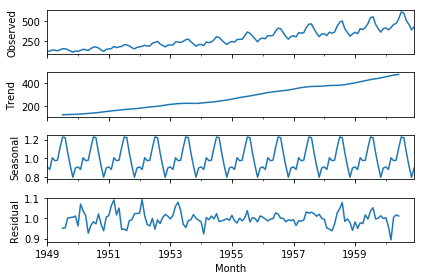

In [21]:
from statsmodels.tsa.seasonal import seasonal_decompose

result = seasonal_decompose(df['Thousands of Passengers'], model='multiplicative')  # model='mul' also works
result.plot();

# Test for Stationarity : post tutorial

 <strong>Augmented Dickey-Fuller Test </strong> is used to find if the dataset is stationary or not. 

<div class="alert alert-info"><h3>Related Function:</h3>
 <strong><a href='https://www.statsmodels.org/stable/generated/statsmodels.tsa.stattools.adfuller.html'>stattools.adfuller</a></strong><font color=black>(x[, maxlag, regression, …])</font>&nbsp;&nbsp;Augmented Dickey-Fuller unit root test<br>
 
 </div>

In [22]:
from statsmodels.tsa.stattools import adfuller

In [23]:
df = pd.read_csv("./Data/airline_passengers.csv",index_col=0,parse_dates=True)

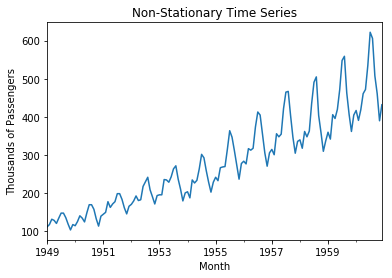

In [24]:
airline_plot = df['Thousands of Passengers'].plot()
airline_plot.autoscale(axis='x',tight=True)
airline_plot.set(ylabel='Thousands of Passengers', title="Non-Stationary Time Series");

In [25]:
dftest = adfuller(df['Thousands of Passengers'],autolag='AIC')

dfout = pd.Series(dftest[0:4],index=['ADF test statistic','p-value','# lags used','# observations'])

print("For data to be stationary the p-value <= 0.05 \n\n ")
print(dfout)
if dfout[1] <= 0.05:
    print("\n Data is stationary")
else:
    print("\n  Data is non-stationary")

For data to be stationary the p-value <= 0.05 

 
ADF test statistic      0.815369
p-value                 0.991880
# lags used            13.000000
# observations        130.000000
dtype: float64

  Data is non-stationary


In [26]:
df_stationary = pd.read_csv("./Data/DailyTotalFemaleBirths.csv",index_col=0,parse_dates=True)

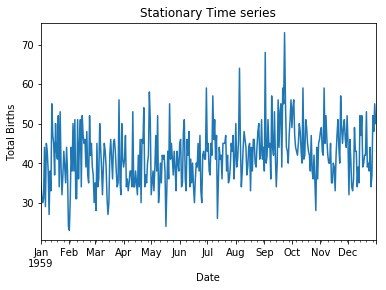

In [27]:
birth_plot = df_stationary['Births'].plot()
birth_plot.autoscale(axis='x',tight=True)
birth_plot.set(ylabel='Total Births', title="Stationary Time series");

In [28]:
dftest = adfuller(df_stationary['Births'],autolag='AIC')

dfout = pd.Series(dftest[0:4],index=['ADF test statistic','p-value','# lags used','# observations'])

print("For data to be stationary the p-value <= 0.05 \n\n ")
print(dfout)
if dfout[1] <= 0.05:
    print("\n Data is stationary")
else:
    print("\n  Data is non-stationary")

For data to be stationary the p-value <= 0.05 

 
ADF test statistic     -4.808291
p-value                 0.000052
# lags used             6.000000
# observations        358.000000
dtype: float64

 Data is stationary


# Statistical Models

# SMA
## Simple Moving Average

It is calculated by applying a <tt>mean</tt> function in a rolling window manner.

In [29]:
df['6-month-SMA'] = df['Thousands of Passengers'].rolling(window=6).mean()
df['12-month-SMA'] = df['Thousands of Passengers'].rolling(window=12).mean()

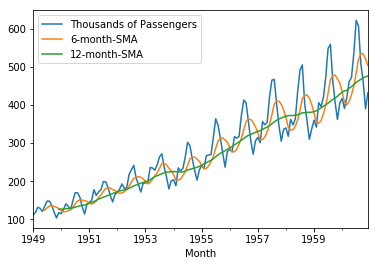

In [30]:
df.plot();

# EWMA
## Exponentially Weighted Moving Average 


EWMA puts more weight on the recent values.

### $\begin{split}y_0 &= x_0 \\
y_t &= (1 - \alpha) y_{t-1} + \alpha x_t,\end{split}$
 
where $\alpha$ is the smoothing factor with values ranging from $0<\alpha≤1$

In [31]:
df['EWMA12'] = df['Thousands of Passengers'].ewm(span=12,adjust=False).mean()

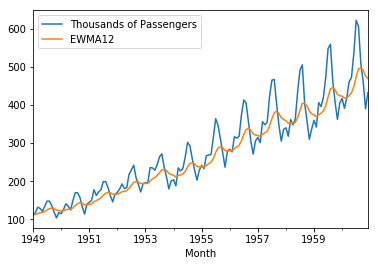

In [32]:
df[['Thousands of Passengers','EWMA12']].plot();

# Comparing SMA to EWMA

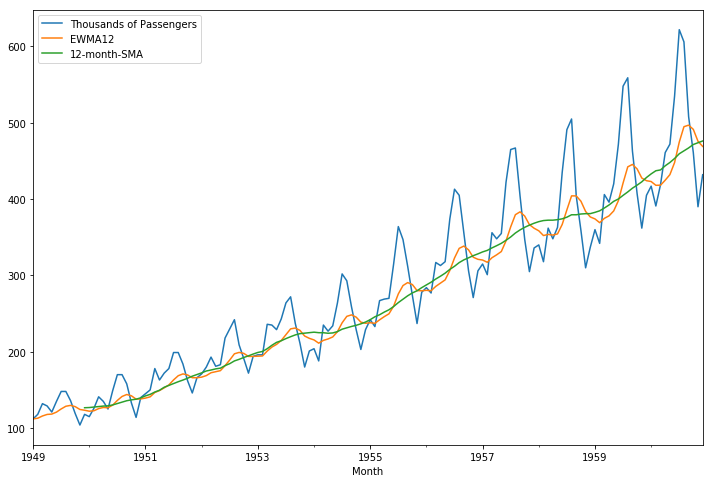

In [33]:
df[['Thousands of Passengers','EWMA12','12-month-SMA']].plot(figsize=(12,8)).autoscale(axis='x',tight=True);

# Holt-Winters Methods

<em>Double</em> and <em>Triple Exponential Smoothing</em> with the <a href='https://otexts.com/fpp2/holt-winters.html'>Holt-Winters Methods</a>. 

In <strong>Double Exponential Smoothing</strong> (aka Holt's Method) a new smoothing factor $\beta$ (beta) is used that addresses trend:

\begin{split}l_t &= (1 - \alpha) l_{t-1} + \alpha x_t, & \text{    level}\\
b_t &= (1-\beta)b_{t-1} + \beta(l_t-l_{t-1}) & \text{    trend}\\
y_t &= l_t + b_t & \text{    fitted model}\\
\hat y_{t+h} &= l_t + hb_t & \text{    forecasting model (} h = \text{# periods into the future)}\end{split}

In <strong>Triple Exponential Smoothing</strong> (aka the Holt-Winters Method) another smoothing factor $\gamma$ (gamma) is added to address seasonality:

\begin{split}l_t &= (1 - \alpha) l_{t-1} + \alpha x_t, & \text{    level}\\
b_t &= (1-\beta)b_{t-1} + \beta(l_t-l_{t-1}) & \text{    trend}\\
c_t &= (1-\gamma)c_{t-L} + \gamma(x_t-l_{t-1}-b_{t-1}) & \text{    seasonal}\\
y_t &= (l_t + b_t) c_t & \text{    fitted model}\\
\hat y_{t+m} &= (l_t + mb_t)c_{t-L+1+(m-1)modL} & \text{    forecasting model (} m = \text{# periods into the future)}\end{split}

Higher values for $\alpha$, $\beta$ and $\gamma$ (values closer to 1), place more emphasis on recent data.

If a time series displays a straight-line sloped trend, an <strong>additive</strong> model is preferred. If the time series displays an exponential (curved) trend, a <strong>multiplicative</strong> model can be used.

<div class="alert alert-info"><h3>Statsmodel Function:</h3>
<tt><strong><a href='https://www.statsmodels.org/stable/generated/statsmodels.tsa.holtwinters.SimpleExpSmoothing.html'>statsmodels.tsa.holtwinters.SimpleExpSmoothing</a></strong><font color=black>(endog)</font>&nbsp;&nbsp;&nbsp;&nbsp;
Simple Exponential Smoothing<br>
<strong><a href='https://www.statsmodels.org/stable/generated/statsmodels.tsa.holtwinters.ExponentialSmoothing.html'>statsmodels.tsa.holtwinters.ExponentialSmoothing</a></strong><font color=black>(endog)</font>&nbsp;&nbsp;
    Holt-Winters Exponential Smoothing</tt>
    


## Simple Exponential Smoothing  using Statsmodel

In [34]:
df.columns

Index(['Thousands of Passengers', '6-month-SMA', '12-month-SMA', 'EWMA12'], dtype='object')

In [35]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

span = 12
alpha = 2/(span+1)

df['SES12']=SimpleExpSmoothing(df['Thousands of Passengers']).fit(smoothing_level=alpha,optimized=False).fittedvalues.shift(-1)
df.head()

/Users/sandhyasingh/.virtualenvs/py3-test/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


,Thousands of Passengers,6-month-SMA,12-month-SMA,EWMA12,SES12
Month,,,,,
1949-01-01,112,NaN,NaN,112.000000,112.000000
1949-02-01,118,NaN,NaN,112.923077,112.923077
1949-03-01,132,NaN,NaN,115.857988,115.857988
1949-04-01,129,NaN,NaN,117.879836,117.879836
1949-05-01,121,NaN,NaN,118.359861,118.359861


## Double Exponential Smoothing

In [36]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

df['DESadd12'] = ExponentialSmoothing(df['Thousands of Passengers'], trend='add').fit().fittedvalues.shift(-1)
df.head()

/Users/sandhyasingh/.virtualenvs/py3-test/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


,Thousands of Passengers,6-month-SMA,12-month-SMA,EWMA12,SES12,DESadd12
Month,,,,,,
1949-01-01,112,NaN,NaN,112.000000,112.000000,114.336233
1949-02-01,118,NaN,NaN,112.923077,112.923077,120.336233
1949-03-01,132,NaN,NaN,115.857988,115.857988,134.336233
1949-04-01,129,NaN,NaN,117.879836,117.879836,131.336233
1949-05-01,121,NaN,NaN,118.359861,118.359861,123.336233


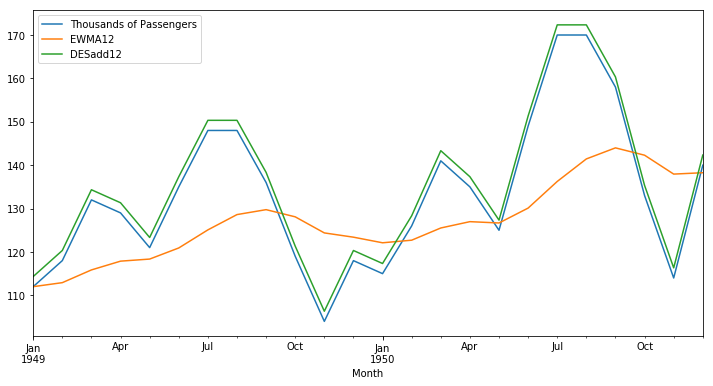

In [37]:
df[['Thousands of Passengers','EWMA12','DESadd12']].iloc[:24].plot(figsize=(12,6)).autoscale(axis='x',tight=True);

Here we can see that Double Exponential Smoothing is a much better representation of the time series data.<br>
Let's see if using a multiplicative seasonal adjustment helps.

In [38]:
df['DESmul12'] = ExponentialSmoothing(df['Thousands of Passengers'], trend='mul').fit().fittedvalues.shift(-1)
df.head()

/Users/sandhyasingh/.virtualenvs/py3-test/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


,Thousands of Passengers,6-month-SMA,12-month-SMA,EWMA12,SES12,DESadd12,DESmul12
Month,,,,,,,
1949-01-01,112,NaN,NaN,112.000000,112.000000,114.336233,112.049247
1949-02-01,118,NaN,NaN,112.923077,112.923077,120.336233,118.051885
1949-03-01,132,NaN,NaN,115.857988,115.857988,134.336233,132.058041
1949-04-01,129,NaN,NaN,117.879836,117.879836,131.336233,129.056722
1949-05-01,121,NaN,NaN,118.359861,118.359861,123.336233,121.053204


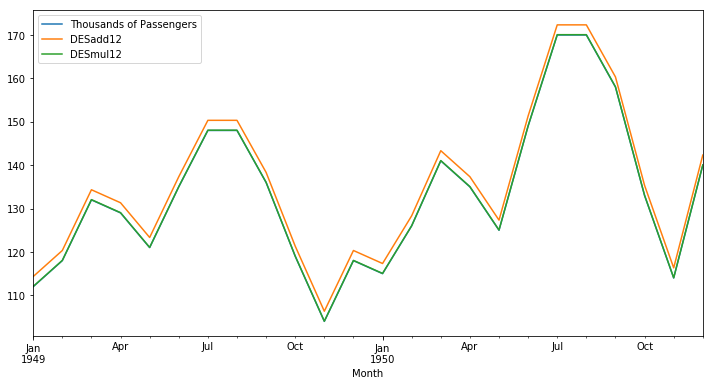

In [39]:
df[['Thousands of Passengers','DESadd12','DESmul12']].iloc[:24].plot(figsize=(12,6)).autoscale(axis='x',tight=True);

<strong>The plot above shows that a multiplicative model gives better results. The green line almost completely overlaps the original data.</strong>

## Triple Exponential Smoothing


In [40]:
df['TESadd12'] = ExponentialSmoothing(df['Thousands of Passengers'],trend='add',seasonal='add',seasonal_periods=12).fit().fittedvalues
df.head()

/Users/sandhyasingh/.virtualenvs/py3-test/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/Users/sandhyasingh/.virtualenvs/py3-test/lib/python3.6/site-packages/statsmodels/tsa/holtwinters.py:712: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)


,Thousands of Passengers,6-month-SMA,12-month-SMA,EWMA12,SES12,DESadd12,DESmul12,TESadd12
Month,,,,,,,,
1949-01-01,112,NaN,NaN,112.000000,112.000000,114.336233,112.049247,113.081288
1949-02-01,118,NaN,NaN,112.923077,112.923077,120.336233,118.051885,120.550747
1949-03-01,132,NaN,NaN,115.857988,115.857988,134.336233,132.058041,135.527329
1949-04-01,129,NaN,NaN,117.879836,117.879836,131.336233,129.056722,133.155064
1949-05-01,121,NaN,NaN,118.359861,118.359861,123.336233,121.053204,125.656114


In [41]:
df['TESmul12'] = ExponentialSmoothing(df['Thousands of Passengers'],trend='mul',seasonal='mul',seasonal_periods=12).fit().fittedvalues
df.head()

/Users/sandhyasingh/.virtualenvs/py3-test/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


,Thousands of Passengers,6-month-SMA,12-month-SMA,EWMA12,SES12,DESadd12,DESmul12,TESadd12,TESmul12
Month,,,,,,,,,
1949-01-01,112,NaN,NaN,112.000000,112.000000,114.336233,112.049247,113.081288,111.583236
1949-02-01,118,NaN,NaN,112.923077,112.923077,120.336233,118.051885,120.550747,118.839294
1949-03-01,132,NaN,NaN,115.857988,115.857988,134.336233,132.058041,135.527329,133.327416
1949-04-01,129,NaN,NaN,117.879836,117.879836,131.336233,129.056722,133.155064,127.915388
1949-05-01,121,NaN,NaN,118.359861,118.359861,123.336233,121.053204,125.656114,120.978320


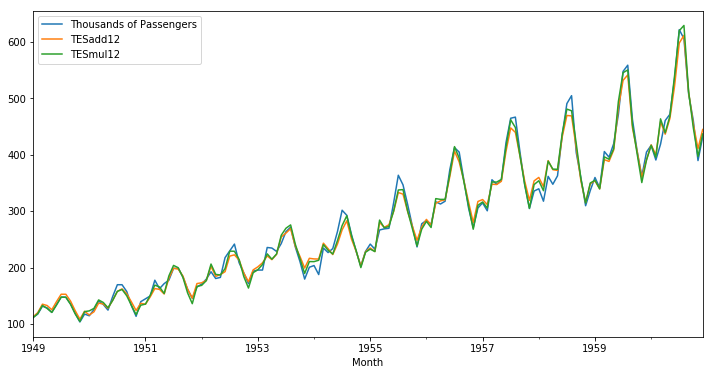

In [42]:
df[['Thousands of Passengers','TESadd12','TESmul12']].plot(figsize=(12,6)).autoscale(axis='x',tight=True);

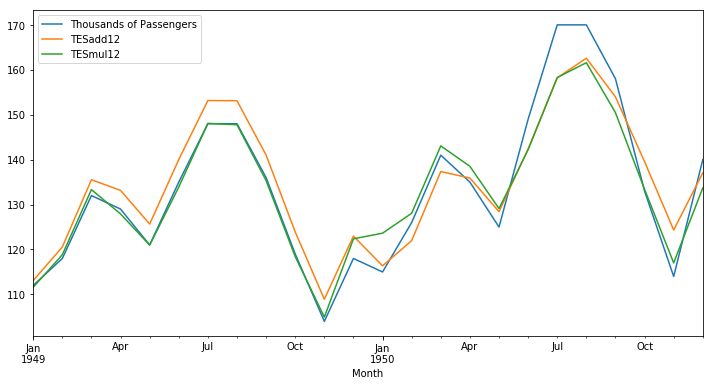

In [43]:
df[['Thousands of Passengers','TESadd12','TESmul12']].iloc[:24].plot(figsize=(12,6)).autoscale(axis='x',tight=True);

# ARIMA Model using pmdarima and statsmodel 

<div class="alert alert-info"><h3>Related Functions:</h3>

<strong>
<a href='https://www.alkaline-ml.com/pmdarima/user_guide.html#user-guide'>pmdarima.auto_arima</a></strong><font color=black>(y[,start_p,d,start_q, …])</font>&nbsp;&nbsp;&nbsp;Returns the optimal order for an ARIMA model<br>

<strong>
<a href='https://www.statsmodels.org/stable/generated/statsmodels.tsa.arima_model.ARIMA.html'>arima_model.ARIMA</a></strong><font color=black>(endog, order[, exog, …])</font>&nbsp;&nbsp;&nbsp;&nbsp;Autoregressive Integrated Moving Average ARIMA(p,d,q) model<br>
<strong>
<a href='https://www.statsmodels.org/stable/generated/statsmodels.tsa.arima_model.ARIMAResults.html'>arima_model.ARIMAResults</a></strong><font color=black>(model, params[, …])</font>&nbsp;&nbsp;Class to hold results from fitting an ARIMA model<br>
</div>

In [44]:
from pmdarima import auto_arima
from statsmodels.tsa.arima_model import ARIMA,ARIMAResults

# Ignore harmless warnings
import warnings
warnings.filterwarnings("ignore")

In [45]:
df = pd.read_csv("./Data/airline_passengers.csv",parse_dates=True)

In [46]:
auto_arima(df['Thousands of Passengers'],error_action='ignore').summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Statespace Model Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                  144
Model:               SARIMAX(2, 1, 2)   Log Likelihood                -666.022
Date:                Wed, 22 Jan 2020   AIC                           1344.044
Time:                        17:55:23   BIC                           1361.821
Sample:                             0   HQIC                          1351.268
                                - 144                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.6620      0.193      3.425      0.001       0.283       1.041
ar.L1          1.6479      0.028     58.885      0.000       1.593       1.703
ar.L2         -0.9096      0.025    -36.751      0.000      -0.958      -0.861
ma.L1         -1.9079      0.356     -5.355      0.000      -2.606      -1.210
ma.L2          0.9977      0.372      2.681      0.007       0.268       1.727
sigma2       611.8534    247.659      2.471      0.013     126.451    1097.256
===================================================================================
Ljung-Box (Q):                      358.21   Jarque-Bera (JB):                 2.78
Prob(Q):                              0.00   Prob(JB):                         0.25
Heteroskedasticity (H):               7.02   Skew:                             0.33
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.18
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [47]:
#split data in train and  12 months of test
train = df.iloc[:132]
test = df.iloc[132:]

<strong>Fit ARIMA(2,1,2) Model </strong>

In [48]:
model = ARIMA(train['Thousands of Passengers'],order=(2,1,2))
arima_model = model.fit()
arima_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 ARIMA Model Results                                 
=====================================================================================
Dep. Variable:     D.Thousands of Passengers   No. Observations:                  131
Model:                        ARIMA(2, 1, 2)   Log Likelihood                -603.341
Method:                              css-mle   S.D. of innovations             23.766
Date:                       Wed, 22 Jan 2020   AIC                           1218.683
Time:                               17:55:24   BIC                           1235.934
Sample:                                    1   HQIC                          1225.693
                                                                                     
===================================================================================================
                                      coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const                               2.6522      0.763      3.476      0.001       1.157       4.148
ar.L1.D.Thousands of Passengers     1.6431      0.035     46.704      0.000       1.574       1.712
ar.L2.D.Thousands of Passengers    -0.9129      0.036    -25.524      0.000      -0.983      -0.843
ma.L1.D.Thousands of Passengers    -1.8478      0.042    -44.380      0.000      -1.929      -1.766
ma.L2.D.Thousands of Passengers     0.9466      0.037     25.800      0.000       0.875       1.019
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            0.8999           -0.5344j            1.0466           -0.0853
AR.2            0.8999           +0.5344j            1.0466            0.0853
MA.1            0.9760           -0.3221j            1.0278           -0.0507
MA.2            0.9760           +0.3221j            1.0278            0.0507
-----------------------------------------------------------------------------
"""

In [49]:
# get predicted values
start=len(train)
end=len(train)+len(test)-1
predictions_arima = arima_model.predict(start=start, end=end, dynamic=True, typ='levels').rename('ARIMA(2,1,2) Predictions')

In [50]:
predictions_arima

132    415.817681
133    442.376807
134    476.855004
135    509.974185
136    533.631064
137    542.981539
138    537.464039
139    520.578086
140    498.586239
141    478.583472
142    466.510071
143    465.649189
Name: ARIMA(2,1,2) Predictions, dtype: float64

In [51]:
# Compare predictions to expected values
for i in range(132, 143,1):
    print("predicted = ",predictions_arima[i], "\t\t expected = ",test['Thousands of Passengers'][i])

predicted =  415.8176814686482 		 expected =  417
predicted =  442.3768068876962 		 expected =  391
predicted =  476.8550035520882 		 expected =  419
predicted =  509.9741851101935 		 expected =  461
predicted =  533.6310639885797 		 expected =  472
predicted =  542.9815385214205 		 expected =  535
predicted =  537.4640386232888 		 expected =  622
predicted =  520.5780861126957 		 expected =  606
predicted =  498.58623906445234 		 expected =  508
predicted =  478.58347221976493 		 expected =  461
predicted =  466.5100712612339 		 expected =  390


[Text(0,0.5,'Thousands of Passengers')]

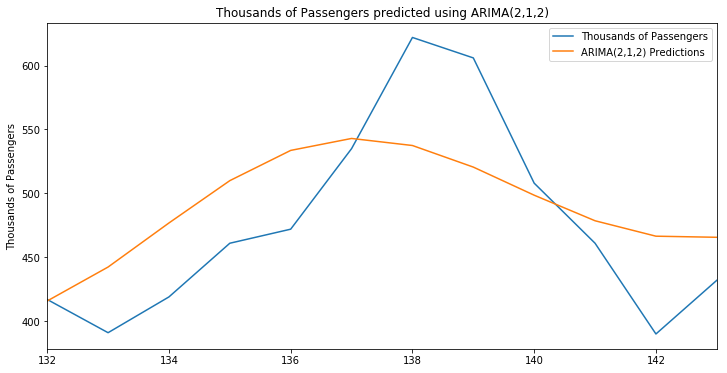

In [52]:
# Plot predictions against known values
title = 'Thousands of Passengers predicted using ARIMA(2,1,2)'
ylabel='Thousands of Passengers'

ax = test['Thousands of Passengers'].plot(legend=True,figsize=(12,6),title=title)
predictions_arima.plot(legend=True)
ax.autoscale(axis='x',tight=True)
ax.set( ylabel=ylabel)

# Facebook Prophet Library

In [53]:
df = pd.read_csv("./Data/airline_passengers.csv",parse_dates=True)

# Prophet Basics

In [54]:
from fbprophet import Prophet

# Load Data

The input to Prophet is always a dataframe with two columns: <strong> ds and y</strong>.

The ds (datestamp) column should be of a format expected by Pandas, ideally YYYY-MM-DD for a date or YYYY-MM-DD HH:MM:SS for a timestamp. 

The y column must be numeric, and represents the measurement to be forecasted.

In [55]:
df.columns 

Index(['Month', 'Thousands of Passengers'], dtype='object')

In [56]:
df.columns = ['ds','y']

In [57]:
df['ds'] = pd.to_datetime(df['ds'])

# Create and fit the model

In [58]:
# This is fitting on all the data 
#(no train test split in this example)
m = Prophet()
m.fit(df)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


# Forecasting

NOTE: Prophet by default is for daily data. We need to pass a frequency for sub-daily or monthly data. Info: https://facebook.github.io/prophet/docs/non-daily_data.html

In [59]:
future = m.make_future_dataframe(periods=12,freq = 'MS')

In [60]:
df.tail()

,ds,y
139,1960-08-01,606
140,1960-09-01,508
141,1960-10-01,461
142,1960-11-01,390
143,1960-12-01,432


In [61]:
future.tail()


,ds
151,1961-08-01
152,1961-09-01
153,1961-10-01
154,1961-11-01
155,1961-12-01


In [62]:
print("original rows==", len(df))
print("future rows==", len(future))

original rows== 144
future rows== 156


# Predict and fill in the Future

In [63]:
forecast = m.predict(future)

In [64]:
forecast.columns

Index(['ds', 'trend', 'yhat_lower', 'yhat_upper', 'trend_lower', 'trend_upper',
       'additive_terms', 'additive_terms_lower', 'additive_terms_upper',
       'yearly', 'yearly_lower', 'yearly_upper', 'multiplicative_terms',
       'multiplicative_terms_lower', 'multiplicative_terms_upper', 'yhat'],
      dtype='object')

In [65]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(12)

,ds,yhat,yhat_lower,yhat_upper
144,1961-01-01,465.761690,436.808405,496.140870
145,1961-02-01,460.109198,431.870575,488.160656
146,1961-03-01,493.140787,463.115817,520.932646
147,1961-04-01,491.559015,461.222713,518.433476
148,1961-05-01,495.977271,465.844013,523.752419
149,1961-06-01,536.880758,510.048759,568.608692
150,1961-07-01,576.525025,549.900006,607.216149
151,1961-08-01,576.942540,551.470534,605.830517
152,1961-09-01,528.436486,500.479151,557.680387
153,1961-10-01,493.188062,465.331520,520.787195


# Plotting Forecast

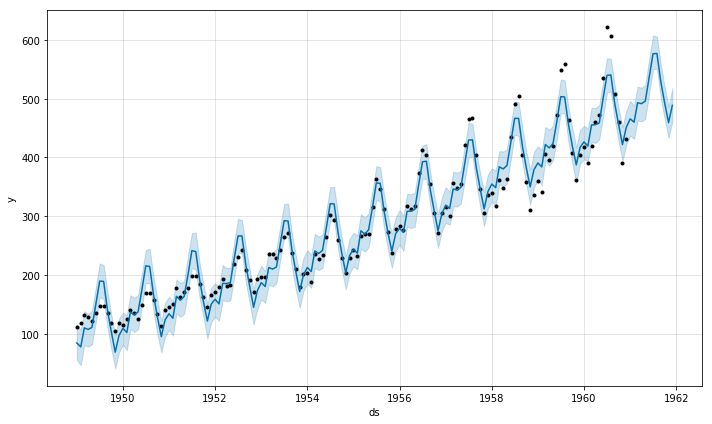

In [66]:
m.plot(forecast);

(715876.0, 716210.0)

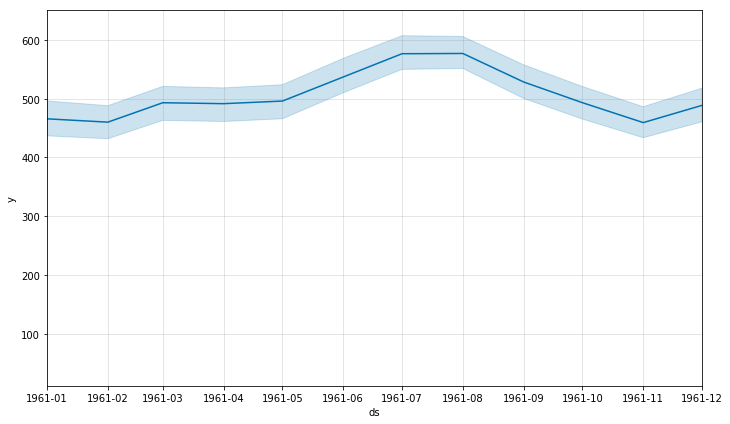

In [67]:
from datetime import datetime
m.plot(forecast)
plt.xlim(datetime(1961, 1, 1),datetime(1961, 12, 1) )

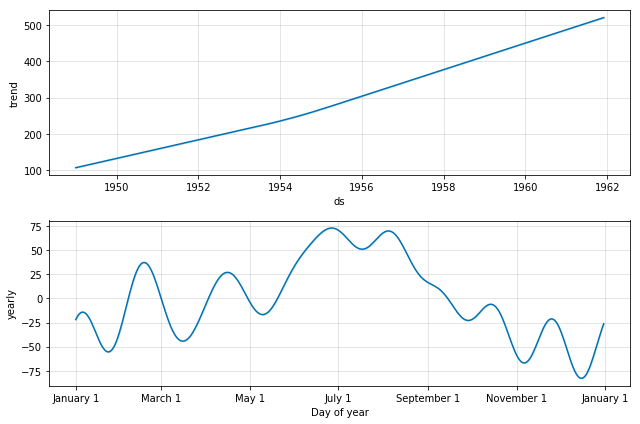

In [68]:
m.plot_components(forecast);

# Forecast Evaluations


In [69]:
train = df.iloc[:132]
test = df.iloc[132:]
print(train.shape, test.shape)

(132, 2) (12, 2)


In [70]:
m = Prophet()
m.fit(train)
future = m.make_future_dataframe(periods=12,freq='MS')
forecast = m.predict(future)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [71]:
df_output = pd.DataFrame({'ds': test['ds'],'target': test['y'], 'predicted': forecast.loc[132:,'yhat']})
print(df_output)

            ds  target   predicted
132 1960-01-01     417  424.819238
133 1960-02-01     391  421.420186
134 1960-03-01     419  456.905666
135 1960-04-01     461  451.340149
136 1960-05-01     472  453.830831
137 1960-06-01     535  493.642568
138 1960-07-01     622  523.753000
139 1960-08-01     606  527.187085
140 1960-09-01     508  486.009260
141 1960-10-01     461  452.301975
142 1960-11-01     390  422.484862
143 1960-12-01     432  447.789224


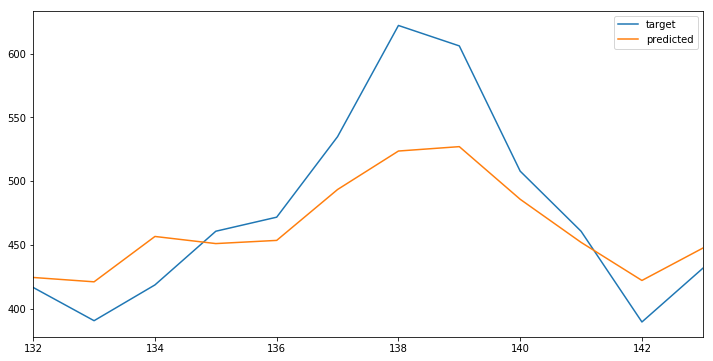

In [72]:
df_output[['target','predicted']].plot(figsize=(12,6)).autoscale(axis='x',tight=True);

# Trend Changes

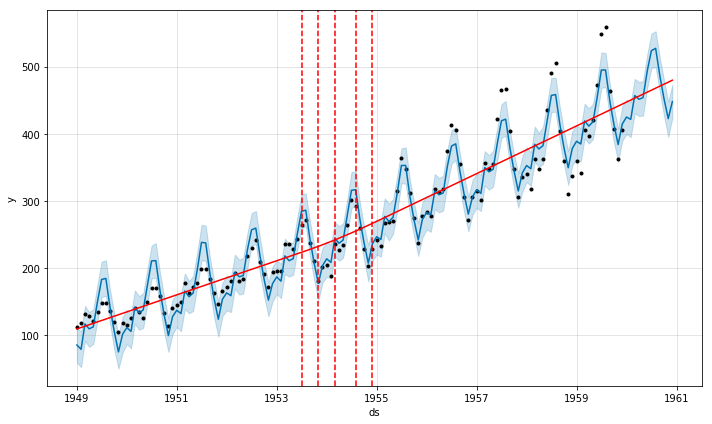

In [73]:
from fbprophet.plot import add_changepoints_to_plot
fig = m.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), m, forecast)

# Changing Seasonality

# Change to Multiplicative

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


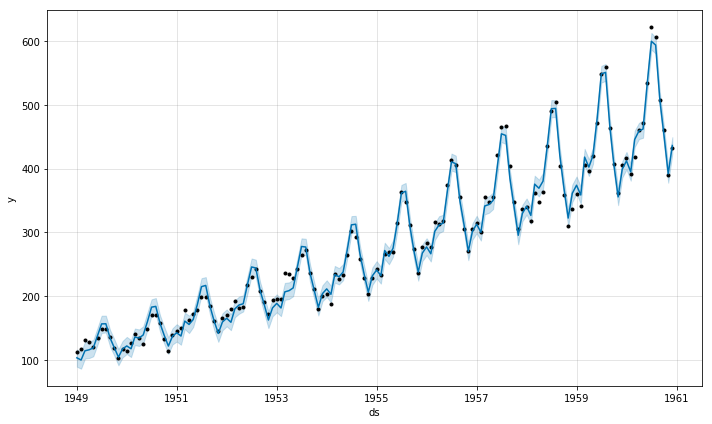

In [74]:
m = Prophet(seasonality_mode='multiplicative')
m.fit(df)
forecast = m.predict(future)
fig = m.plot(forecast)

Index(['ds', 'trend', 'yhat_lower', 'yhat_upper', 'trend_lower', 'trend_upper',
       'multiplicative_terms', 'multiplicative_terms_lower',
       'multiplicative_terms_upper', 'yearly', 'yearly_lower', 'yearly_upper',
       'additive_terms', 'additive_terms_lower', 'additive_terms_upper',
       'yhat'],
      dtype='object')


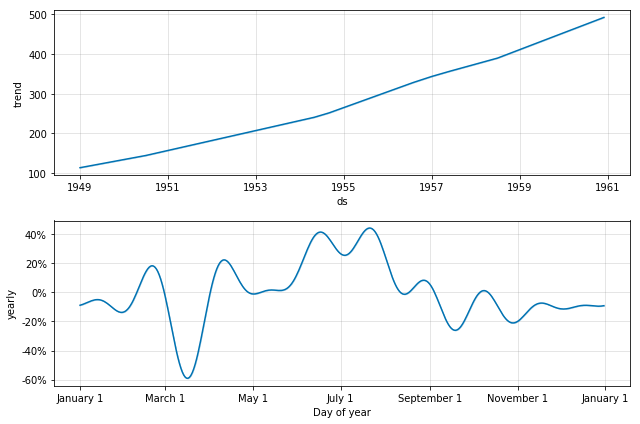

In [75]:
print(forecast.columns)
fig = m.plot_components(forecast)

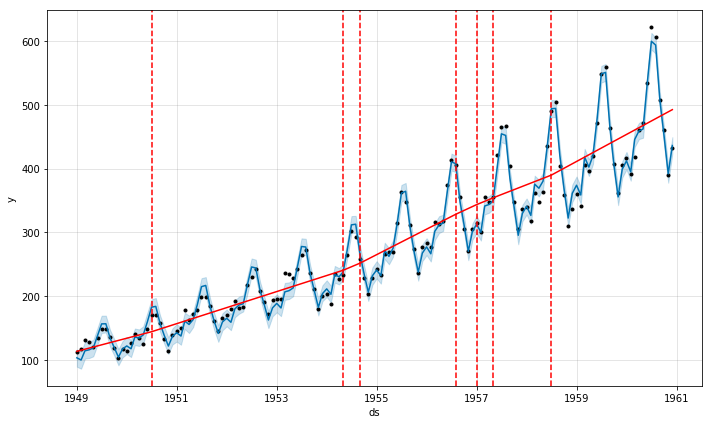

In [76]:
from fbprophet.plot import add_changepoints_to_plot
fig = m.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), m, forecast)

# Comparing Naive predictions with Prophet

In [77]:
df = pd.read_csv("./Data/airline_passengers.csv",parse_dates=True)

In [78]:
df['passenger_forecast']=df['Thousands of Passengers'].shift(1)

In [79]:
df_output = pd.DataFrame({'actual': df['Thousands of Passengers'],'Naive_predictions': df['passenger_forecast'], 'Prophet_predictions': forecast.loc[2:,'yhat']})
df_output.head(10)

,actual,Naive_predictions,Prophet_predictions
0,112,NaN,NaN
1,118,112.0,NaN
2,132,118.0,114.562791
3,129,132.0,116.136497
4,121,129.0,119.058730
5,135,121.0,137.939989
6,148,135.0,156.718265
7,148,148.0,156.920511
8,136,148.0,134.487172
9,119,136.0,119.704726


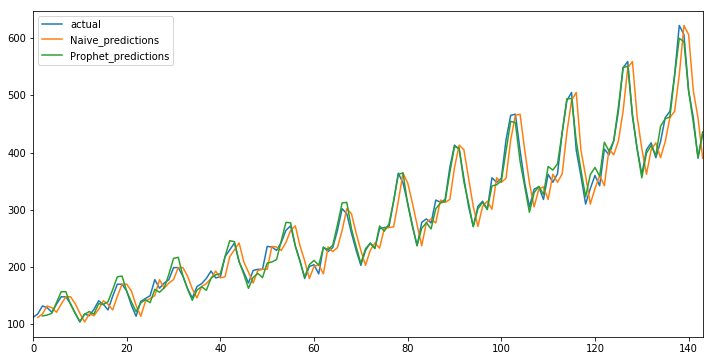

In [80]:
df_output[['actual', 'Naive_predictions', 'Prophet_predictions']].plot(figsize=(12,6)).autoscale(axis='x',tight=True);

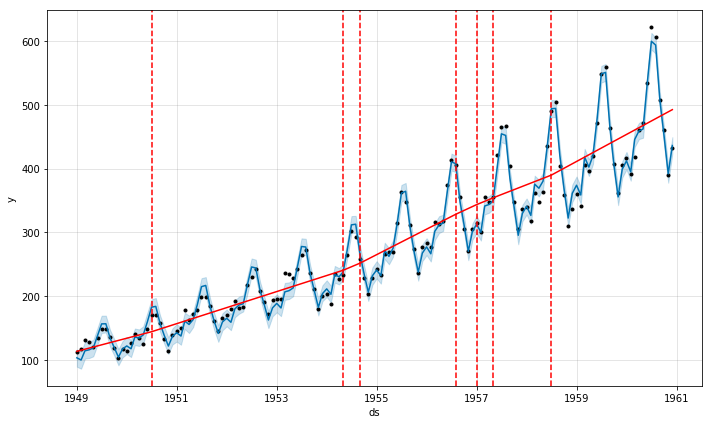

In [81]:
from fbprophet.plot import add_changepoints_to_plot
fig = m.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), m, forecast)

# Thank You

Acknowledgement: "Python for Time Series Analysis" course by Jose Portilla of Pierian Data Inc.